In [63]:
import numpy as np
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from os import listdir
from os.path import isfile, join
import random
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [64]:
os.listdir('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset')

['no', 'yes']

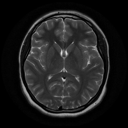

In [65]:
im =Image.open('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\no\\1 no.jpeg').resize((128,128))
im

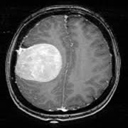

In [66]:
im =Image.open('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\yes\\Y1.jpg').resize((128,128))
im

In [67]:
yes=os.listdir('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\yes')
no=os.listdir('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\no')

In [68]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [69]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [70]:
len(data_target)==len(data)

True

In [71]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
data

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [73]:
yes_values=os.listdir('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\yes')
no_values=os.listdir('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\no')

In [74]:
X_data =[]
for file in yes_values:
    img = cv2.imread('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\yes\\'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [75]:
for file in no_values:
    img = cv2.imread('C:\\Users\\sahay\\OneDrive\\Desktop\\brain_tumor_detection\\brain_tumor_dataset\\no\\'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [76]:
len(X_data)==len(data)==len(data_target)

True

In [77]:
X = np.squeeze(X_data)
X.shape

(253, 32, 32, 3)

In [78]:
# normalize data
X = X.astype('float32')
X /= 255

In [79]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [38]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 16)         

In [39]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [41]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=200,
         validation_data=(x_valid, y_valid),)

Epoch 1/200
2/2 [==============================] - 0s 166ms/step - loss: 0.0111 - acc: 0.9947 - val_loss: 2.5280 - val_acc: 0.7302
Epoch 2/200
2/2 [==============================] - 0s 134ms/step - loss: 0.0340 - acc: 0.9895 - val_loss: 2.5655 - val_acc: 0.6984
Epoch 3/200
2/2 [==============================] - 0s 142ms/step - loss: 0.0363 - acc: 0.9895 - val_loss: 2.4192 - val_acc: 0.6984
Epoch 4/200
2/2 [==============================] - 0s 148ms/step - loss: 0.0191 - acc: 0.9947 - val_loss: 2.2575 - val_acc: 0.7143
Epoch 5/200
2/2 [==============================] - 0s 127ms/step - loss: 0.0109 - acc: 0.9947 - val_loss: 2.2189 - val_acc: 0.7143
Epoch 6/200
2/2 [==============================] - 0s 139ms/step - loss: 0.0049 - acc: 1.0000 - val_loss: 2.2020 - val_acc: 0.6825
Epoch 7/200
2/2 [==============================] - 0s 130ms/step - loss: 0.0231 - acc: 0.9895 - val_loss: 1.7112 - val_acc: 0.7619
Epoch 8/200
2/2 [==============================] - 0s 131ms/step - loss: 0.0299 - a

Epoch 125/200
2/2 [==============================] - 0s 128ms/step - loss: 0.0262 - acc: 0.9895 - val_loss: 2.1075 - val_acc: 0.7143
Epoch 126/200
2/2 [==============================] - 0s 146ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 2.4151 - val_acc: 0.6984
Epoch 127/200
2/2 [==============================] - 0s 129ms/step - loss: 0.0066 - acc: 1.0000 - val_loss: 2.7965 - val_acc: 0.6190
Epoch 128/200
2/2 [==============================] - 0s 127ms/step - loss: 0.0178 - acc: 0.9895 - val_loss: 2.7109 - val_acc: 0.6667
Epoch 129/200
2/2 [==============================] - 0s 127ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 2.3349 - val_acc: 0.7143
Epoch 130/200
2/2 [==============================] - 0s 127ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.9496 - val_acc: 0.7460
Epoch 131/200
2/2 [==============================] - 0s 126ms/step - loss: 0.0092 - acc: 1.0000 - val_loss: 1.8974 - val_acc: 0.7778
Epoch 132/200
2/2 [==============================] - 0s 129ms/step - 

In [42]:
model.save("brain_tumor_detection_model.h5")

In [43]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8095238208770752


In [ ]:
# Now the following code is to check how's our model working 

In [80]:
labels =["Yes","No",]

In [84]:
loaded_model = tf.keras.models.load_model('brain_tumor_detection_model.h5')

In [85]:
#check the accuracy score of model on unseen data
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8095238208770752


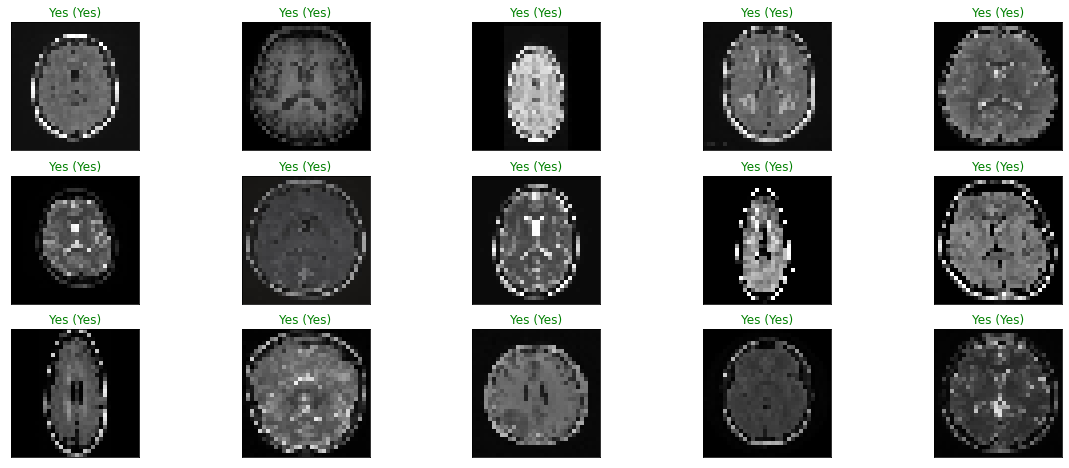

In [86]:
y_hat = loaded_model.predict(x_test)

# Plots a random sample of 10 test images, their predicted labels and original labels
figure = plt.figure(figsize=(20, 8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(x_test[index])
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],labels[true_index]),color=("green" if predict_index == true_index else "red"))
plt.show()